In [1]:
import numpy as np
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import time
start = time.time()

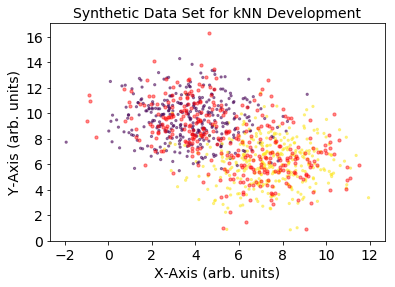

In [2]:
'''
Generate training dataset for k-NN Development.
'''
X, y = make_blobs(n_samples=1000, 
                              centers=2, 
                              n_features=2,
                              cluster_std=1.75, 
                              center_box=(0, 10),
                              random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

'''
Plot out both datasets.
'''
plt.scatter(X_test[:, 0], X_test[:, 1], s=10, color='red', zorder=100, alpha=0.45)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.5, s=5)
plt.title('Synthetic Data Set for kNN Development', fontsize=14)
plt.xlabel('X-Axis (arb. units)', fontsize=14)
plt.ylabel('Y-Axis (arb. units)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()                                    

In [3]:
def knn(X_train, y_train, X_test, y_test, num_k):
    
    _y_pred_class = []
    
    for index, each in enumerate(X_test):
        _dist_array = (((X_train[:, 0] - X_test[index][0])**2) +\
                       ((X_train[:, 1] - X_test[index][1])**2))**(0.5)
        _dist_array_sort = np.sort(_dist_array)
        _y_pred_class.append(np.argmax(np.bincount(y_train[np.argsort(_dist_array)][:num_k])))
    
    return np.array(_y_pred_class)

def confusion_matrix(y_true_class, y_pred_class):
    
    num_k = len(np.unique(y_true_class))
    len_true = len(y_true_class)
    result_matrix = np.zeros((num_k, num_k))
    
    for each in range(len_true):
        result_matrix[y_true_class[each]][y_pred_class[each]] += 1
    
    return result_matrix

#TODO: def train_test_split() Grant

In [4]:
num_ = knn(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, num_k=3)

In [5]:
confusion_matrix(y_test, num_)

array([[158.,  10.],
       [ 18., 144.]])

In [6]:
end = time.time()
print('Elapased Time: {0:.2f} seconds'.format(end-start))

Elapased Time: 0.33 seconds


In [7]:
#TODO: eed to vectorize function so that it doesn't need to loop